In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/Users/bhagii/Desktop/USVisaApprovalPrediction/Dataset/EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploring the Data


In [7]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f"We have {len(numeric_features)} Numeric Features : {numeric_features} \n")
print(f"We have {len(categorical_features)} Categorical Features : {categorical_features}")

We have 3 Numeric Features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 

We have 9 Categorical Features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-"*50)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name

## Univariate Analysis of Data

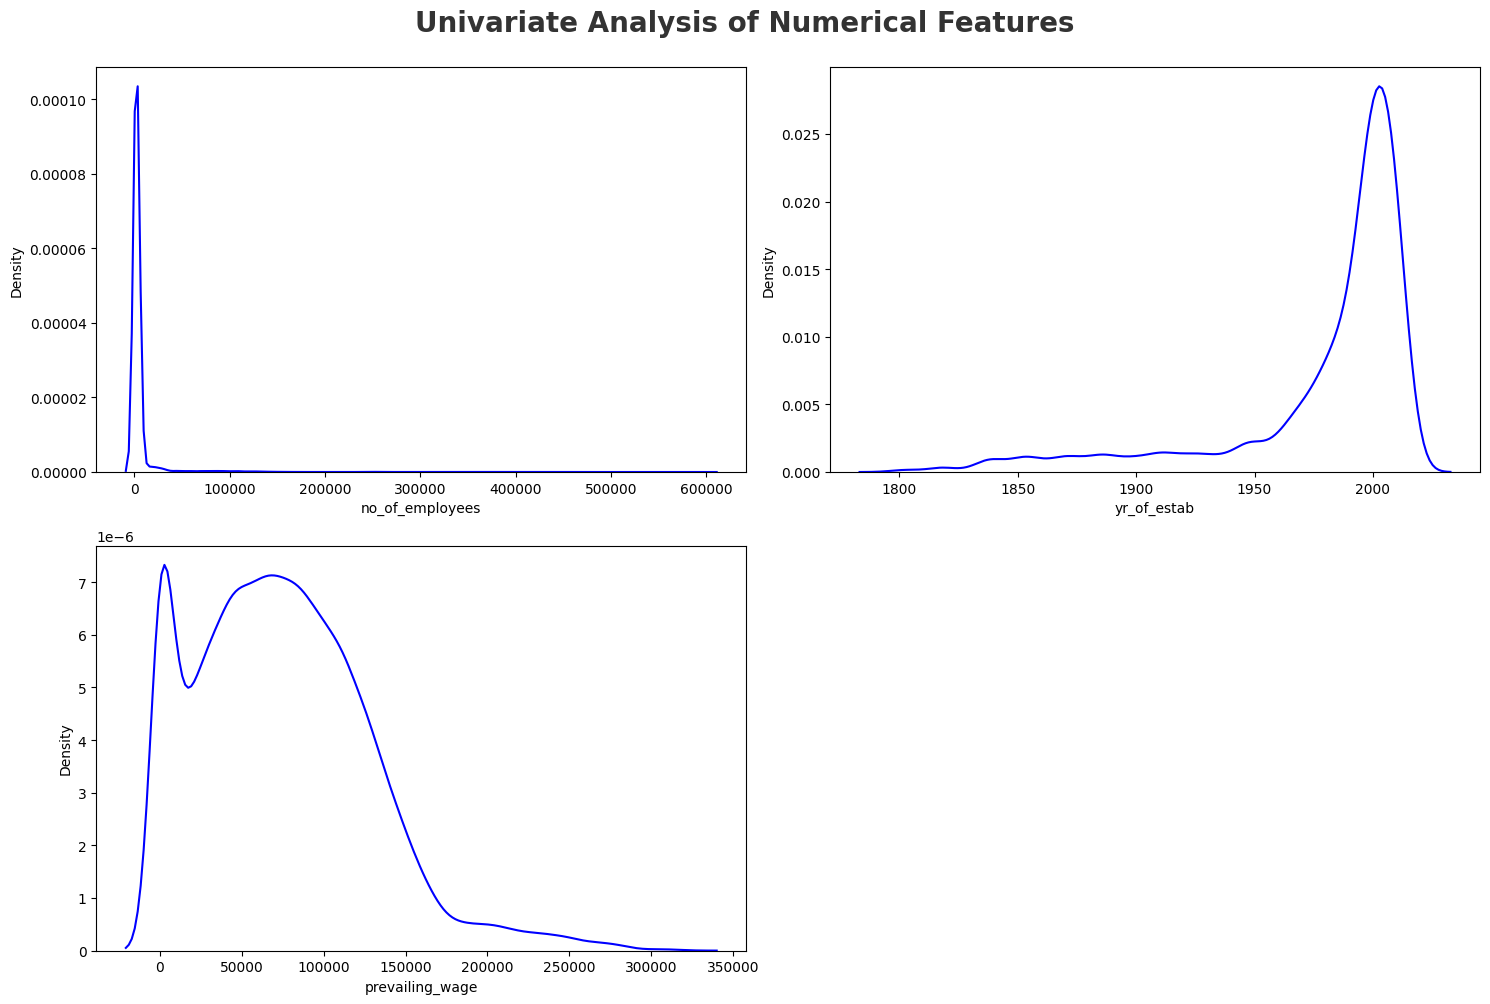

In [12]:
numeric_features.append
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

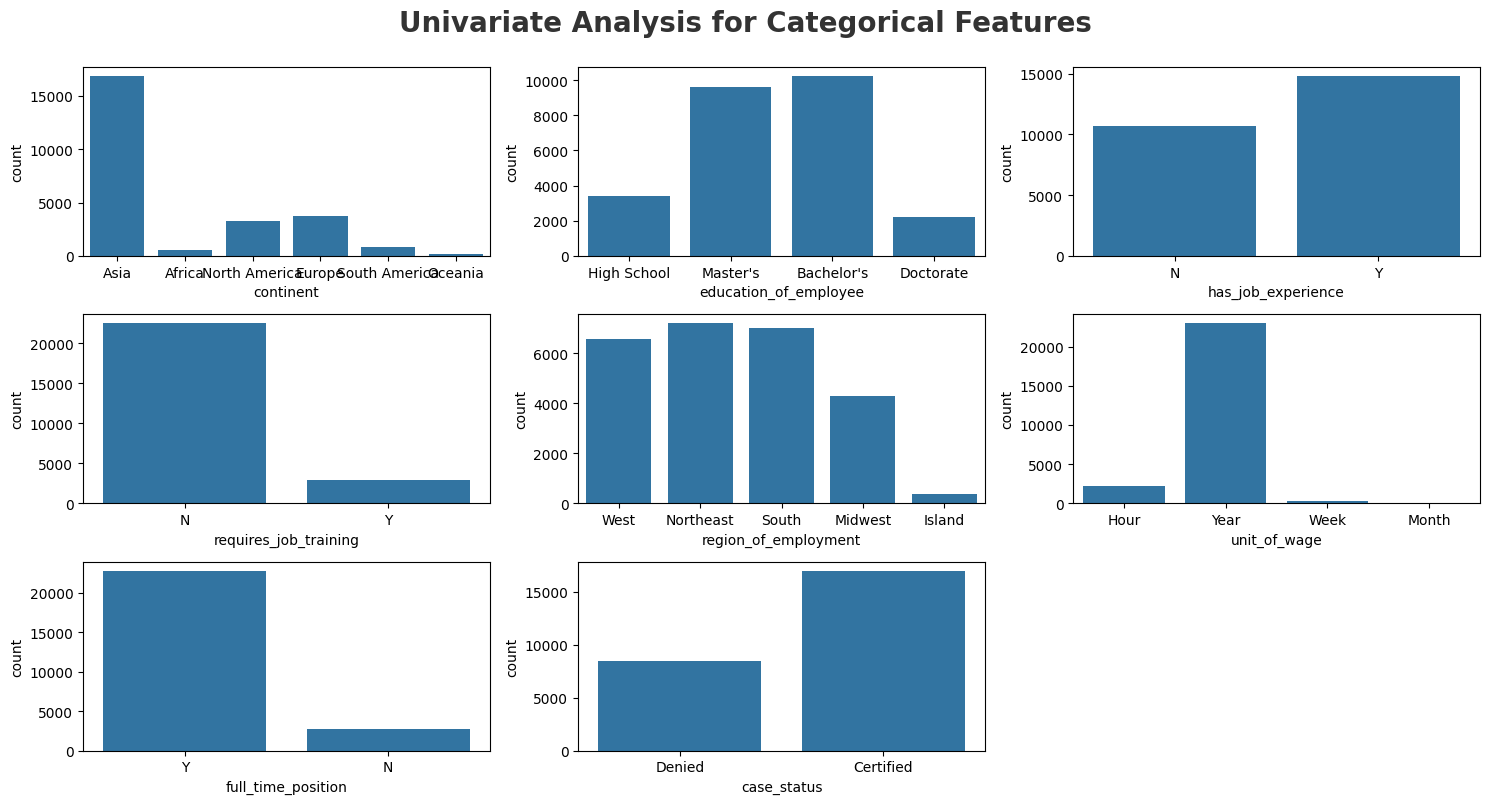

In [24]:
#categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle("Univariate Analysis for Categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## Mulitivariate Analysis of Data

In [27]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continous_features=[feature for feature in numeric_features if len(df[feature].unique())>25]

print(f" We have {len(discrete_features)} Discrete Features which are : {discrete_features}")
print(f" We have {len(continous_features)} Continues Features which are : {continous_features}")

 We have 0 Discrete Features which are : []
 We have 3 Continues Features which are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [30]:
from scipy.stats import chi2_contingency
chi2_test=[]
correlation=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
        chi2_test.append('Reject Null Hypothesis')
        correlation.append('Correlated')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
        correlation.append('Not Correlated')

result=pd.DataFrame(data=[categorical_features,chi2_test,correlation]).T
result.columns=["Feature","Chi2 Test", "Correlation"]
result


,Feature,Chi2 Test,Correlation
0,continent,Reject Null Hypothesis,Correlated
1,education_of_employee,Reject Null Hypothesis,Correlated
2,has_job_experience,Reject Null Hypothesis,Correlated
3,requires_job_training,Fail to Reject Null Hypothesis,Not Correlated
4,region_of_employment,Reject Null Hypothesis,Correlated
5,unit_of_wage,Reject Null Hypothesis,Correlated
6,full_time_position,Reject Null Hypothesis,Correlated
7,case_status,Reject Null Hypothesis,Correlated


In [32]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [33]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/4008885346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/4008885346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/4008885346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1

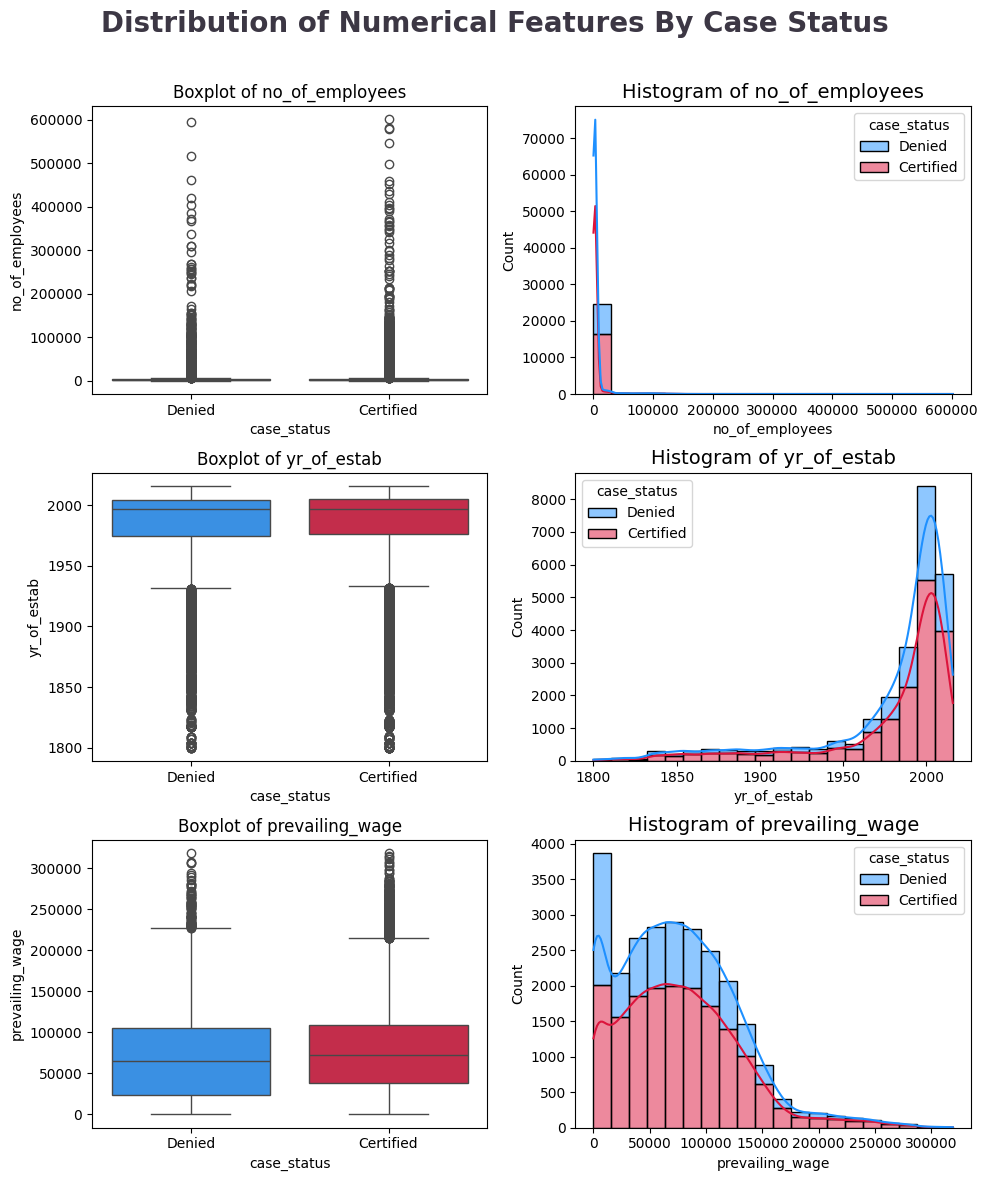

In [35]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

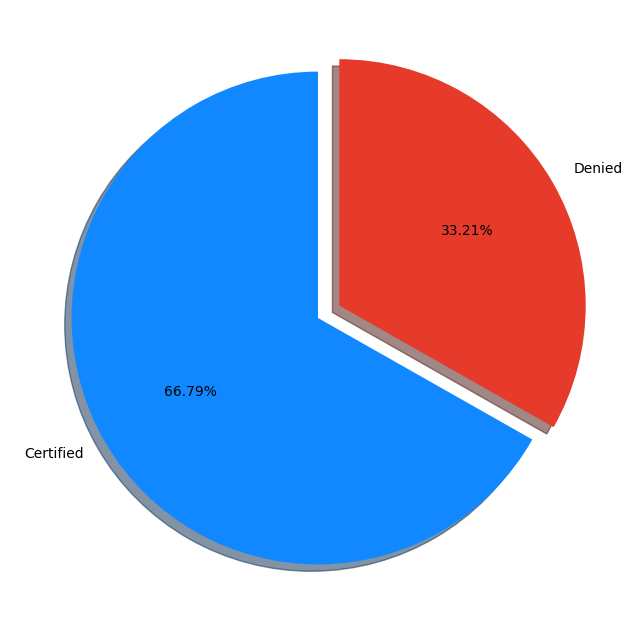

In [37]:
percentage=df.case_status.value_counts(normalize=True)*100
labels=["Certified","Denied"]
fig,ax=plt.subplots(figsize=(15,8))
explode=(0,0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()


In [39]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

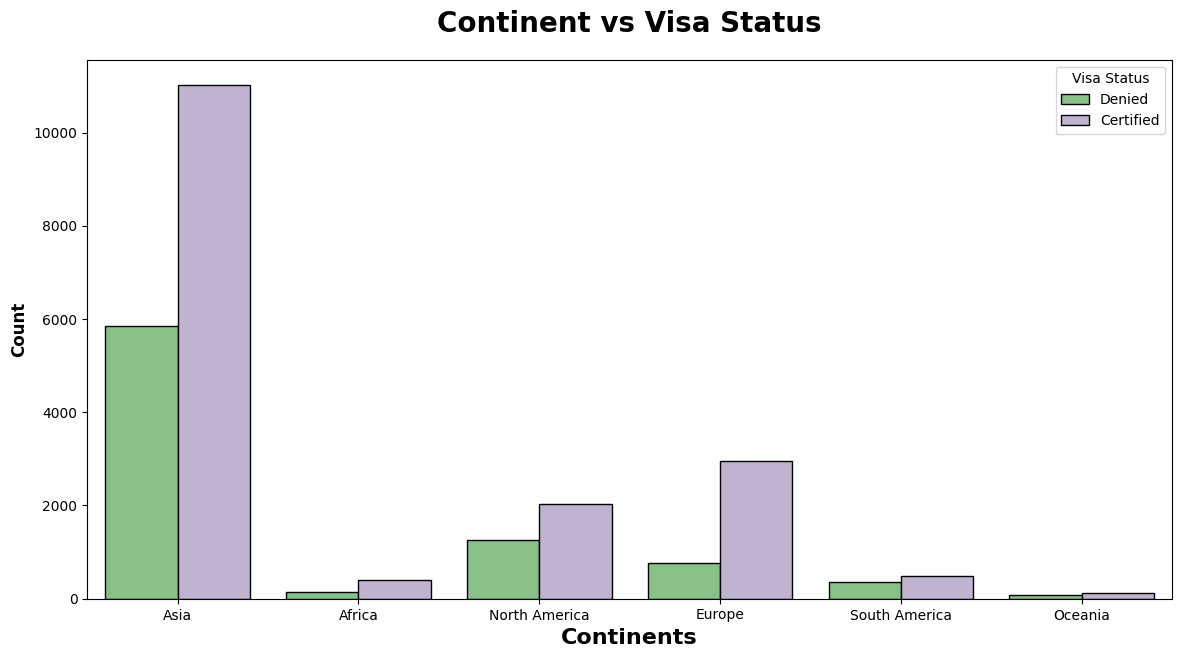

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [41]:
df2=df.copy()

/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/4062120739.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


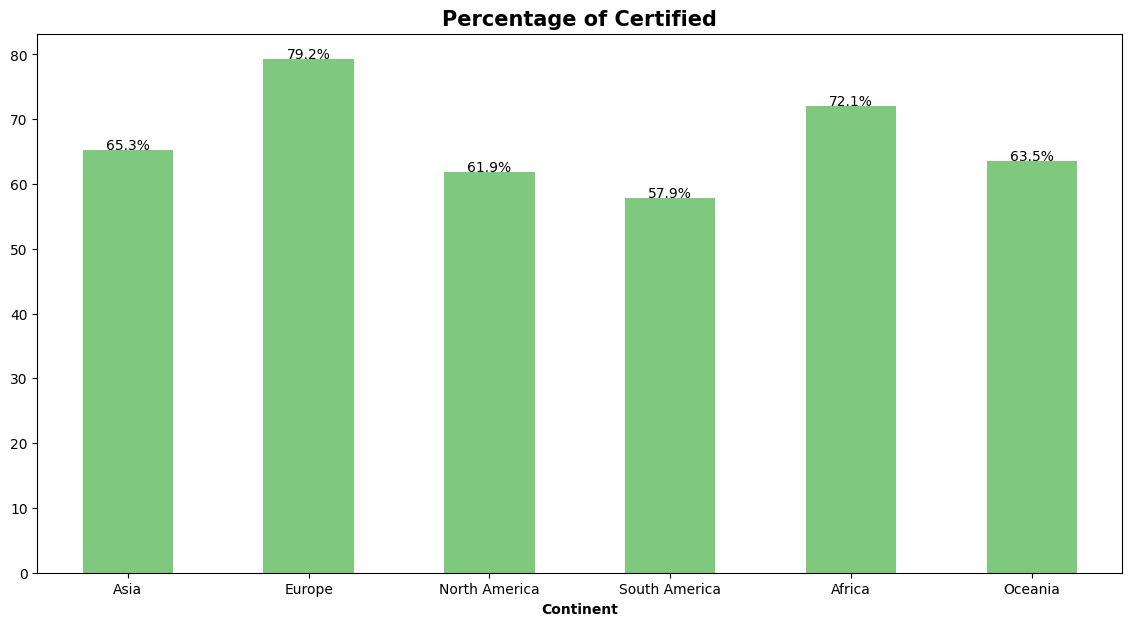

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [45]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

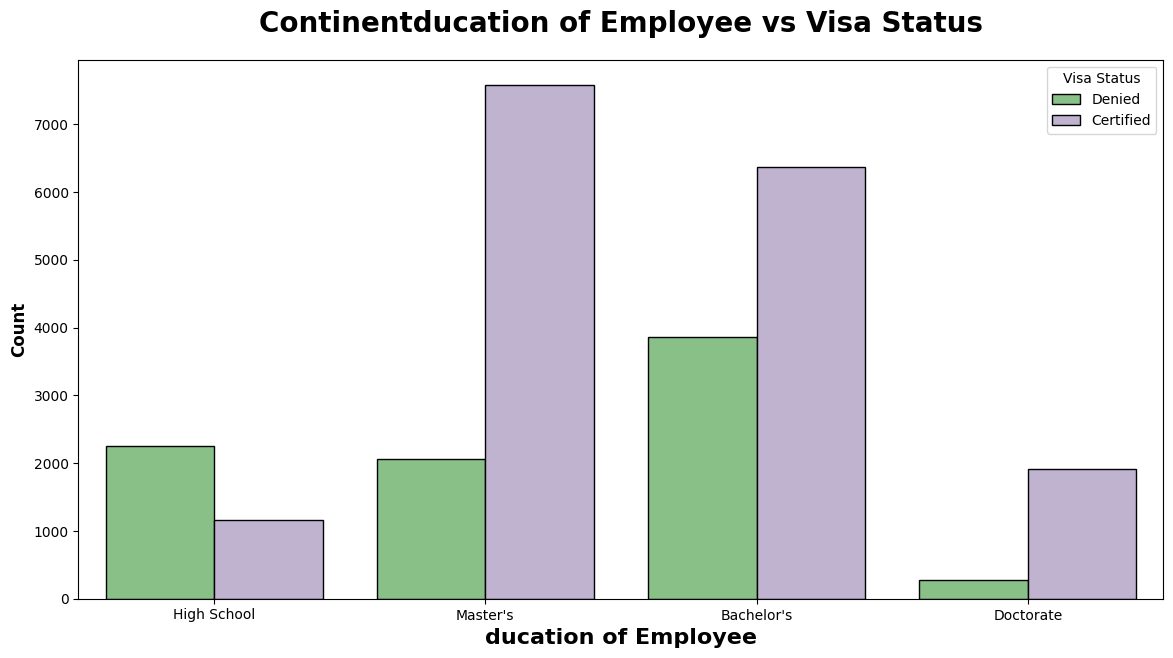

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continentducation of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/936321740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


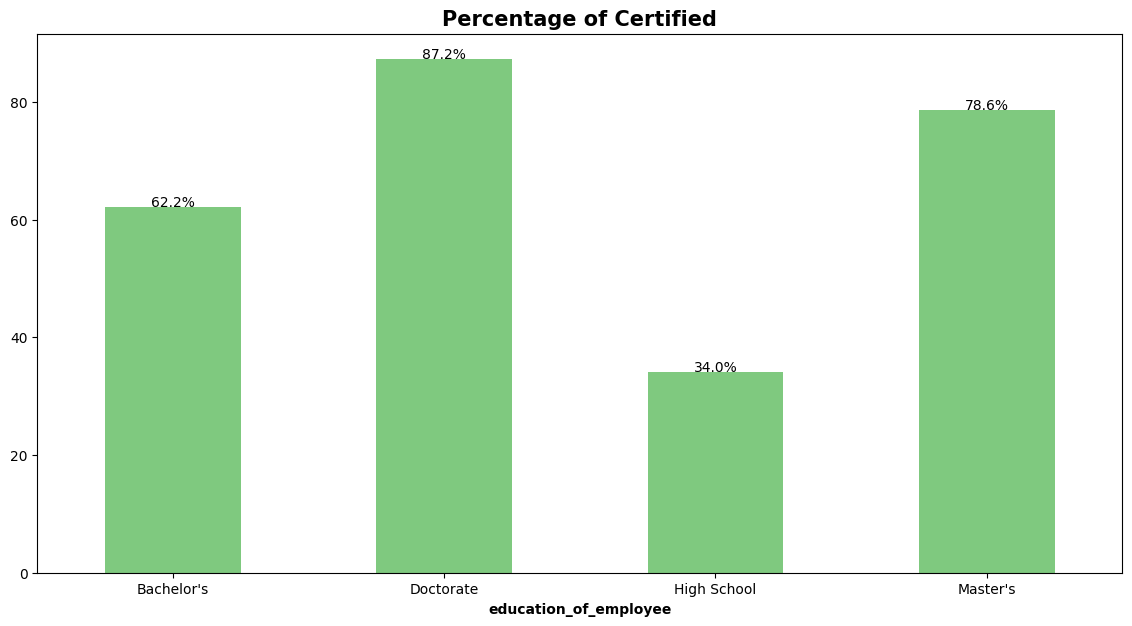

In [48]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [70]:
job_exp=df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100
job_exp

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

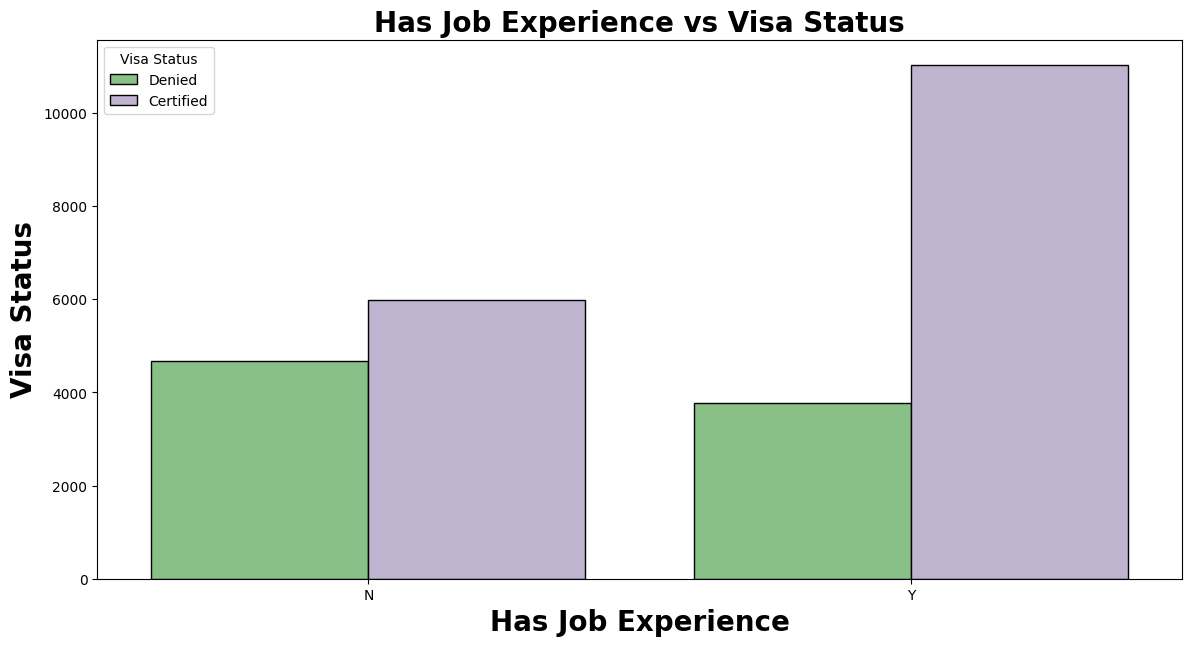

In [78]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x='has_job_experience',hue='case_status',data=df,ec='black',palette='Accent')
plt.title("Has Job Experience vs Visa Status",fontsize=20,weight='bold')
plt.xlabel("Has Job Experience",weight='bold',fontsize=20)
plt.ylabel("Visa Status",weight='bold',fontsize=20)
plt.legend(title="Visa Status",fancybox=True)
plt.show()

 SHape of order : (2,)


/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/133397408.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


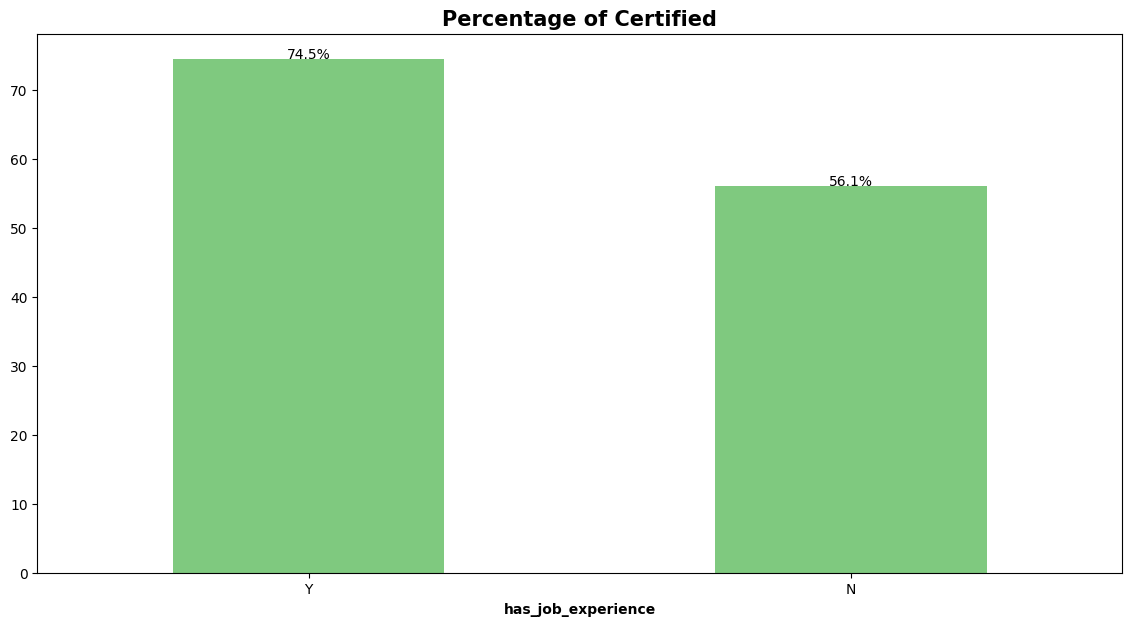

In [80]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
print(f" SHape of order : {order1.shape}")
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [86]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

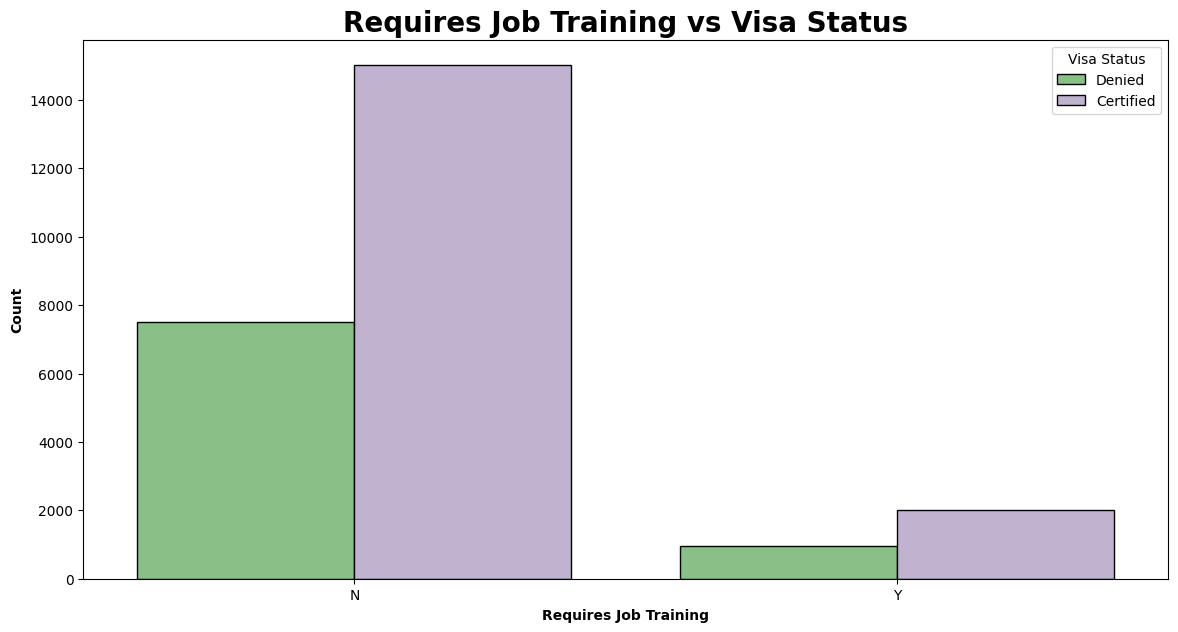

In [93]:
plt.figure(figsize=(14,7))
sns.countplot(x='requires_job_training',hue='case_status',ec='black',data=df,palette='Accent')
plt.title("Requires Job Training vs Visa Status",weight='bold',size=20)
plt.xlabel("Requires Job Training",weight='bold',size=10)
plt.ylabel("Count",weight='bold',size=10)
plt.legend(title="Visa Status",fancybox=True)
plt.show()

/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_9926/2820459642.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


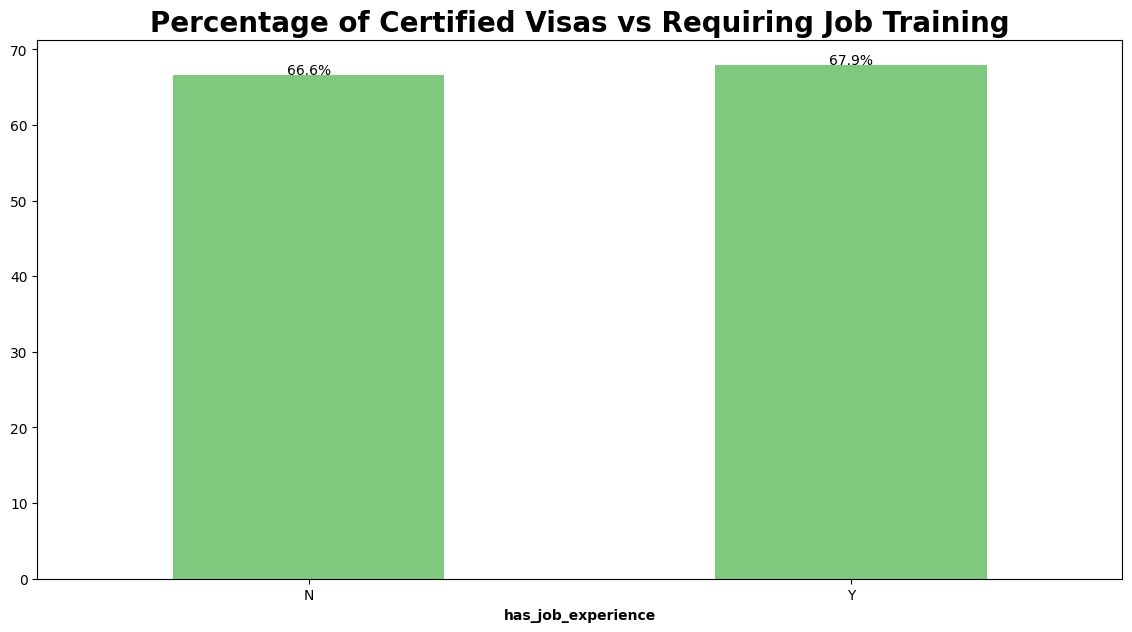

In [100]:
plt.figure(figsize=(14,7))

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',colormap='Accent',stacked=True)
plt.title("Percentage of Certified Visas vs Requiring Job Training",weight='bold',size=20)
order1=100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()
    